In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft
from scipy.stats import wasserstein_distance

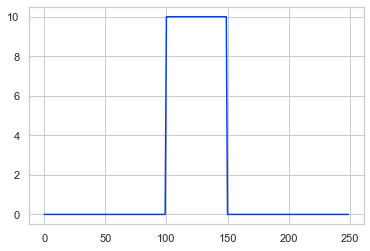

In [50]:
from scipy import signal
x = np.arange(0, 250, 1)
y = np.zeros(250)
y[0:100] = 0
y[100:150] = 10
y[150:250] = 0
plt.plot(x, y)
plt.show()

In [51]:
#x = np.arange(1, 31, 1)
signal_3 = pd.DataFrame(zip(x,y),columns=['Time','Value'])

# FFT regeneration

In [52]:
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    #freq_ampli_real = pd.DataFrame(zip(f[:N//2+1],yf[:N//2+1].real),columns=['Freq','Ampli'])
    freq_ampli_img = pd.DataFrame(zip(f[:N//2+1],yf[:N//2+1].imag),columns=['Freq','Ampli'])
    return freq_ampli_img
freq_ampli3i = freq(signal_3)

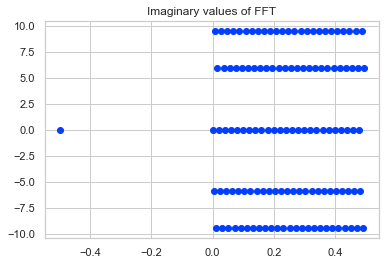

In [53]:
#sns.lineplot(freq_ampli3['Freq'], freq_ampli3['Ampli'])
#plt.xlim(0, 0.2)
#plt.title('Real values of FFT')
#plt.show()
plt.scatter(freq_ampli3i['Freq'], freq_ampli3i['Ampli'])
plt.title('Imaginary values of FFT')
plt.show()

In [54]:
np.shape(freq_ampli3i)

(126, 2)

In [55]:
def GMM_fit(df):
    dfx = df
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 50)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(dfx)
            bic.append(gmm.bic(dfx))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    return best_gmm

In [56]:
#best_gmm0 = GMM_fit(freq_ampli3)                        # GMM on real part of FFT data
best_gmm0i = GMM_fit(freq_ampli3i)                      

In [57]:
print(best_gmm0i, '\n')
print('WEIGHTS -', best_gmm0i.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',best_gmm0i.means_, '\n')

GaussianMixture(covariance_type='tied', n_components=5) 

WEIGHTS - [0.20634921 0.1984127  0.1984127  0.1984127  0.1984127 ] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[ 2.11538462e-01 -2.59910115e-16]
 [ 2.56000000e-01  5.87785252e+00]
 [ 2.52000000e-01 -9.51056516e+00]
 [ 2.48000000e-01  9.51056516e+00]
 [ 2.44000000e-01 -5.87785252e+00]] 



In [58]:
#Sampling
#z1,_ = best_gmm0.sample(126)
z1i,_ = best_gmm0i.sample(126)

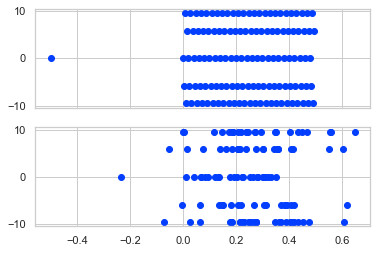

In [59]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].scatter(freq_ampli3i['Freq'], freq_ampli3i['Ampli'])
#plt.show()
ax[1].scatter(z1i[:, 0], z1i[:, 1])
plt.show()

In [60]:
#sample_1 = pd.DataFrame(zip(z1[:,0],z1[:,1]),columns=['Freq','Ampli'])           
sample_1i = pd.DataFrame(zip(z1i[:,0],z1i[:,1]),columns=['Freq','Ampli'])

In [61]:
#sample_1 = sample_1.sort_values(by=['Freq'],ascending=True)     
#sample_1 = sample_1[sample_1.Freq > 0]                           
sample_1i = sample_1i.sort_values(by=['Freq'],ascending=True)
sample_1i = sample_1i[sample_1i.Freq > 0]                        

In [62]:
f = fftpack.fftfreq(250)       
sd = dict(zip(np.round(f,3),np.zeros(len(f))))
#sample_1.Freq = sample_1.Freq.apply(lambda x:round(x,3))       
sample_1i.Freq = sample_1i.Freq.apply(lambda x:round(x,3))
#samp_1 = dict(zip(sample_1.Freq,sample_1.Ampli))
samp_1i = dict(zip(sample_1i.Freq,sample_1i.Ampli))

In [63]:
for i in samp_1i.keys():
    if i in sd:
        sd[i] = complex(sd[i],samp_1i[i])
        sd[-i] = complex(sd[i],-(samp_1i[i]))
    elif i+0.001 in sd:
        sd[i+0.001] = complex(sd[i+0.001],samp_1i[i])
        sd[-(i+0.001)] = complex(sd[i+0.001],-(samp_1i[i]))
    elif i-0.001 in sd:
        sd[i-0.001] = complex(sd[i-0.001],samp_1i[i])
        sd[-(i-0.001)] = complex(sd[i-0.001],-(samp_1i[i]))
sd

{0.0: 0j,
 0.004: 9.511689867678037j,
 0.008: 0.0,
 0.012: -0.0007901659326353238j,
 0.016: 5.878775330583631j,
 0.02: 0.0,
 0.024: 0.0,
 0.028: 0.0,
 0.032: 0.0,
 0.036: 0.0,
 0.04: 0.0008098463479639617j,
 0.044: 0.0,
 0.048: 0.0,
 0.052: 0.0,
 0.056: 0.0,
 0.06: 0.0,
 0.064: 0.0,
 0.068: 0.0020166525915198004j,
 0.072: 0.0,
 0.076: 5.87701758063793j,
 0.08: 0.0,
 0.084: -0.0016179745184541842j,
 0.088: 0.0,
 0.092: 0.0,
 0.096: 0.0,
 0.1: 0.0,
 0.104: 0.0,
 0.108: 0.0,
 0.112: 0.0,
 0.116: 0.0,
 0.12: -0.0019085744152399766j,
 0.124: 0.0,
 0.128: 0.0,
 0.132: 0.0,
 0.136: -0.00022432330267866397j,
 0.14: 5.876993014344349j,
 0.144: 0.0,
 0.148: 9.511994743846257j,
 0.152: 0.0,
 0.156: 0.0,
 0.16: 0.0,
 0.164: 5.877165914808854j,
 0.168: 0.0,
 0.172: 9.508729935542826j,
 0.176: 0.0,
 0.18: -15.389111769346442j,
 0.184: 9.510865074650757j,
 0.188: 9.509273309557784j,
 0.192: 0.0,
 0.196: 0.0,
 0.2: 0.0,
 0.204: 0.0,
 0.208: 15.388799345476055j,
 0.212: 0.0,
 0.216: -3.632354280305907j

In [64]:
value = list(sd.values())

# Final IFFT

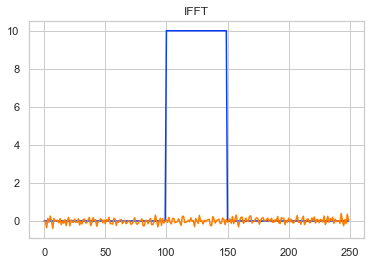

In [65]:
ift = fft.ifft(value)
plt.title('IFFT')
plt.plot(signal_3['Time'], signal_3['Value'])
plt.plot(x,ift)

# Log FFT regeneration

In [66]:
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    #freq_ampli_real = pd.DataFrame(zip(f[:N//2+1],yf[:N//2+1].real),columns=['Freq','Ampli'])
    freq_ampli_img = pd.DataFrame(zip(f[:N//2+1],yf[:N//2+1].imag),columns=['Freq','Ampli'])
    return freq_ampli_img
freq_ampli3i = freq(signal_3)

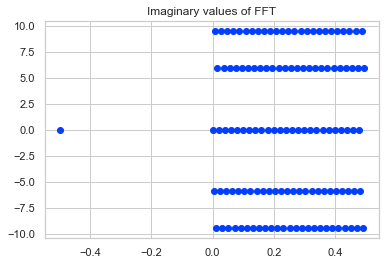

In [67]:
#sns.lineplot(freq_ampli3['Freq'], freq_ampli3['Ampli'])
#plt.xlim(0, 0.2)
#plt.title('Real values of FFT')
#plt.show()
plt.scatter(freq_ampli3i['Freq'], freq_ampli3i['Ampli'])
plt.title('Imaginary values of FFT')
plt.show()

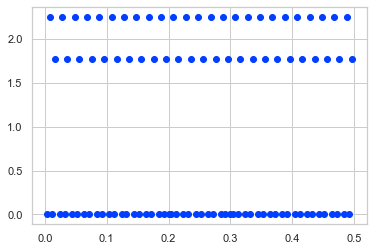

In [68]:
#freq_ampli3['Ampli'] = np.log(freq_ampli3["Ampli"])
#freq_ampli3 = freq_ampli3.loc[freq_ampli3['Ampli'] != float('-inf')]
#freq_ampli3 = freq_ampli3.dropna()
#plt.scatter(freq_ampli3['Freq'], freq_ampli3['Ampli'])
#plt.show()
freq_ampli3i['Ampli'] = np.log(freq_ampli3i["Ampli"])
freq_ampli3i = freq_ampli3i.loc[freq_ampli3i['Ampli'] != float('-inf')]
freq_ampli3i = freq_ampli3i.fillna(0)
plt.scatter(freq_ampli3i['Freq'], freq_ampli3i['Ampli'])
plt.show()

In [69]:
np.shape(freq_ampli3i)

(102, 2)

In [70]:
def GMM_fit(df):
    dfx = df
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 50)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(dfx)
            bic.append(gmm.bic(dfx))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    return best_gmm

In [71]:
#best_gmm0 = GMM_fit(freq_ampli3)                        # GMM on real part of FFT data
best_gmm0i = GMM_fit(freq_ampli3i)                      # GMM on imaginary part of FFT data

In [72]:
'''print(best_gmm0, '\n')
print('WEIGHTS -', best_gmm0.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',best_gmm0.means_, '\n')'''

"print(best_gmm0, '\n')\nprint('WEIGHTS -', best_gmm0.weights_, '\n')\nprint('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',best_gmm0.means_, '\n')"

In [73]:
print(best_gmm0i, '\n')
print('WEIGHTS -', best_gmm0i.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',best_gmm0i.means_, '\n')

GaussianMixture(covariance_type='tied', n_components=3) 

WEIGHTS - [0.24509804 0.50980392 0.24509804] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[0.248      2.2524033 ]
 [0.24807692 0.        ]
 [0.256      1.77119148]] 



In [74]:
#Sampling
#z1,_ = best_gmm0.sample(126)
z1i,_ = best_gmm0i.sample(126)

In [75]:
'''fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].scatter(freq_ampli3['Freq'], freq_ampli3['Ampli'])
#plt.show()
ax[1].scatter(z1[:, 0], z1[:, 1])
plt.show()'''

"fig, ax = plt.subplots(2, sharex='all', sharey='all')\nax[0].scatter(freq_ampli3['Freq'], freq_ampli3['Ampli'])\n#plt.show()\nax[1].scatter(z1[:, 0], z1[:, 1])\nplt.show()"

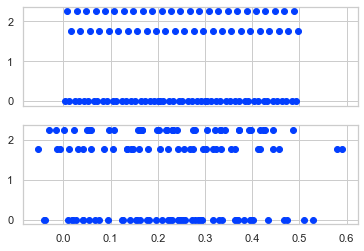

In [76]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].scatter(freq_ampli3i['Freq'], freq_ampli3i['Ampli'])
#plt.show()
ax[1].scatter(z1i[:, 0], z1i[:, 1])
plt.show()

In [77]:
#print('Real: ', wasserstein_distance(freq_ampli3['Ampli'], z1[:, 1]))
#print('Imag: ', wasserstein_distance(freq_ampli3i['Ampli'], z1i[:, 1]))

In [78]:
z1i[:, 1] = np.exp(z1i[:, 1])

In [79]:
'''plt.figure(figsize=(20,10))
sns.distplot(freq_ampli3['Ampli'], kde = True)
sns.distplot(z1[:, 1], kde = True)
#plt.ylim(0.0, 0.2)
plt.show()'''

"plt.figure(figsize=(20,10))\nsns.distplot(freq_ampli3['Ampli'], kde = True)\nsns.distplot(z1[:, 1], kde = True)\n#plt.ylim(0.0, 0.2)\nplt.show()"

In [80]:
#sample_1 = pd.DataFrame(zip(z1[:,0],z1[:,1]),columns=['Freq','Ampli'])           
sample_1i = pd.DataFrame(zip(z1i[:,0],z1i[:,1]),columns=['Freq','Ampli'])

In [81]:
#sample_1 = sample_1.sort_values(by=['Freq'],ascending=True)     
#sample_1 = sample_1[sample_1.Freq > 0]                           
sample_1i = sample_1i.sort_values(by=['Freq'],ascending=True)
sample_1i = sample_1i[sample_1i.Freq > 0]                        

In [82]:
#sample_1 = sample_1[(sample_1.Ampli>1) | (sample_1.Ampli<-1)]
#sample_1i = sample_1i[(sample_1i.Ampli>1) | (sample_1i.Ampli<-1)]

In [83]:
f = fftpack.fftfreq(250)                                    # The frequency corresponding to each value in FFT is stored in 'f'

In [84]:
sd = dict(zip(np.round(f,3),np.zeros(len(f))))

In [85]:
#sample_1.Freq = sample_1.Freq.apply(lambda x:round(x,3))       
sample_1i.Freq = sample_1i.Freq.apply(lambda x:round(x,3))

In [86]:
#samp_1 = dict(zip(sample_1.Freq,sample_1.Ampli))
samp_1i = dict(zip(sample_1i.Freq,sample_1i.Ampli))

In [87]:
'''for i in samp_1.keys():
    if i in sd:
        sd[i] = samp_1[i]
        sd[-i] = samp_1[i]
    elif i+0.001 in sd:
        sd[i+0.001] = samp_1[i]
        sd[-(i+0.001)] = samp_1[i]
    elif i-0.001 in sd:
        sd[i-0.001] = samp_1[i]
        sd[-(i-0.001)] = samp_1[i]
sd'''

'for i in samp_1.keys():\n    if i in sd:\n        sd[i] = samp_1[i]\n        sd[-i] = samp_1[i]\n    elif i+0.001 in sd:\n        sd[i+0.001] = samp_1[i]\n        sd[-(i+0.001)] = samp_1[i]\n    elif i-0.001 in sd:\n        sd[i-0.001] = samp_1[i]\n        sd[-(i-0.001)] = samp_1[i]\nsd'

In [88]:
for i in samp_1i.keys():
    if i in sd:
        sd[i] = complex(sd[i],samp_1i[i])
        sd[-i] = complex(sd[i],-(samp_1i[i]))
    elif i+0.001 in sd:
        sd[i+0.001] = complex(sd[i+0.001],samp_1i[i])
        sd[-(i+0.001)] = complex(sd[i+0.001],-(samp_1i[i]))
    elif i-0.001 in sd:
        sd[i-0.001] = complex(sd[i-0.001],samp_1i[i])
        sd[-(i-0.001)] = complex(sd[i-0.001],-(samp_1i[i]))
sd

{0.0: 0.0,
 0.004: 0.0,
 0.008: 1.0011138672415902j,
 0.012: 5.874739848578015j,
 0.016: 0.0,
 0.02: 1.9996834196248279j,
 0.024: 0.0,
 0.028: 0.0,
 0.032: 0.0,
 0.036: 0.0,
 0.04: 0.0,
 0.044: 0.0,
 0.048: 0.0,
 0.052: 0.0,
 0.056: 0.0,
 0.06: 9.500747899963802j,
 0.064: 0.0,
 0.068: 0.0,
 0.072: 0.0,
 0.076: 1.0003264581316578j,
 0.08: 0.0,
 0.084: 0.0,
 0.088: 0.0,
 0.092: 0.0,
 0.096: 9.51552389197607j,
 0.1: 0.0,
 0.104: 5.873269825338143j,
 0.108: 9.495249771973498j,
 0.112: 0.0,
 0.116: 0.0,
 0.12: 0.0,
 0.124: 1.0016879108417844j,
 0.128: 0.0,
 0.132: 0.0,
 0.136: 5.874110617592583j,
 0.14: 0.0,
 0.144: 5.889383087626093j,
 0.148: 5.873045798917836j,
 0.152: 0.0,
 0.156: 1.0010095924604965j,
 0.16: 5.884147898989458j,
 0.164: 10.507958417930555j,
 0.168: 9.527773718225859j,
 0.172: 0.0,
 0.176: 1.000348658691812j,
 0.18: 6.872547730891905j,
 0.184: 0.0,
 0.188: 0.0,
 0.192: 0.0,
 0.196: 0.9995584593976733j,
 0.2: 0.0,
 0.204: 5.873332543561886j,
 0.208: 1.0003517036618308j,
 0.

In [89]:
value = list(sd.values())

# Final IFFT 

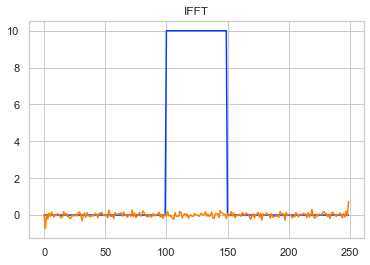

In [90]:
ift = fft.ifft(value)
plt.title('IFFT')
plt.plot(signal_3['Time'], signal_3['Value'])
plt.plot(x,ift)

# Cepstrum

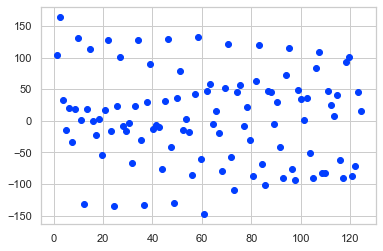

In [91]:
frame_size = signal_3.shape[0]
Fs = 1
dt = 1/Fs
freq_vector = np.fft.rfftfreq(frame_size, d=dt)
y = np.array(signal_3['Value'])
yf = fftpack.fft(y)
yf1 = yf[yf != 0]
quefrency = np.fft.rfftfreq(np.log(yf1).size,freq_vector[1] - freq_vector[0])
cepstrum = np.fft.rfft(np.log(np.abs(yf1)))
cep = pd.DataFrame(zip(quefrency,cepstrum.real),columns=['Quefrency','Cepstrum'])
cep = cep.iloc[1:,:]
plt.scatter(cep.Quefrency,cep.Cepstrum)

In [92]:
dfx = cep
lowest_bic = np.infty
bic = []
n_components_range = range(1, 50)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm3 = gmm

In [93]:
print(best_gmm3, '\n')
print('WEIGHTS -', best_gmm3.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n', best_gmm3.means_, '\n')

GaussianMixture(n_components=48) 

WEIGHTS - [0.03902589 0.01960784 0.00980392 0.01960784 0.03923521 0.01960781
 0.03921006 0.02941176 0.01960784 0.03929811 0.01960752 0.01960783
 0.01960784 0.01960784 0.02929294 0.00980392 0.00980392 0.01960784
 0.01960784 0.00980392 0.01960779 0.02937989 0.02942687 0.00980392
 0.01960784 0.01960778 0.0293268  0.01960784 0.02960152 0.00980392
 0.00980392 0.00980392 0.00980392 0.0295363  0.01960765 0.02924678
 0.01960784 0.0490326  0.00980392 0.00980392 0.0393681  0.00980392
 0.00980392 0.01960784 0.01960784 0.00980392 0.00980392 0.01960784] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[  12.15387023   18.60139576]
 [  65.85365854  -58.69235001]
 [  93.90243902   72.5365566 ]
 [  15.85365854  129.31341482]
 [  65.53680426   -7.70030617]
 [  37.8048684   -71.24013141]
 [ 114.02402683  -85.39529468]
 [  36.58536585 -132.94957562]
 [ 118.9024379    11.86099317]
 [ 101.21215039   31.19359922]
 [  47.56101278   33.63350922]
 [  32.31707504  -22.85508889]
 [

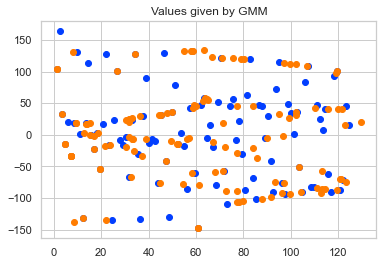

In [94]:
z3,_ = best_gmm3.sample(125)
plt.title('Actual data')
plt.scatter(cep['Quefrency'], cep['Cepstrum'])
#plt.show()
plt.title('Values given by GMM')
plt.scatter(z3[:,0],z3[:,1])
plt.show()

In [95]:
wasserstein_distance(cep['Cepstrum'], z3[:, 1])

6.916211331001433

In [96]:
def dim(df):
    d = []
    for i,j in df.values.tolist():
        for k in range(round(j)):
            d.append(i)
    return d
list(np.array(cep))
c = dim(cep)
cep.sort_values(by=['Cepstrum'],ascending = False)
np.shape(c)

(3190,)

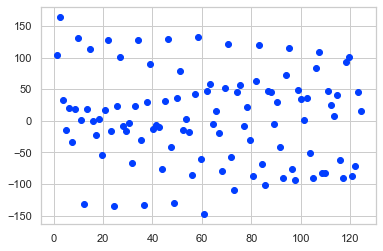

<AxesSubplot:ylabel='Density'>

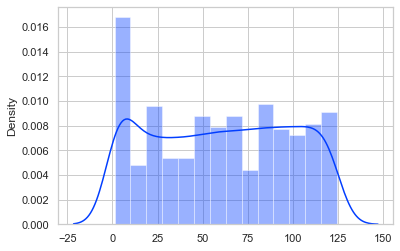

In [97]:
plt.scatter(cep['Quefrency'], cep['Cepstrum'])
plt.show()
sns.distplot(c)

In [98]:
c = np.array(c).reshape(-1,1)
def GMM_fit(df):
    dfx = df
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 50)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(dfx)
            bic.append(gmm.bic(dfx))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    return best_gmm
best_gmm22 = GMM_fit(c)

In [99]:
print(best_gmm22, '\n')
print('WEIGHTS -', best_gmm22.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n', best_gmm22.means_, '\n')

GaussianMixture(covariance_type='diag', n_components=49) 

WEIGHTS - [0.03542304 0.03605016 0.04169279 0.02884013 0.04012539 0.01755486
 0.05141066 0.04043887 0.0338558  0.03761755 0.03134794 0.01630094
 0.04106583 0.04012343 0.02789969 0.01097179 0.02539207 0.01818182
 0.01410658 0.01003161 0.00501567 0.01128527 0.01285266 0.02288401
 0.00626959 0.00909091 0.03260188 0.03824451 0.02601881 0.03166144
 0.00689655 0.01943574 0.00470219 0.01473354 0.01410658 0.01473354
 0.01504702 0.01473328 0.00720993 0.01442006 0.01034483 0.01316614
 0.01128505 0.00658534 0.01003135 0.00721003 0.00909091 0.00595608
 0.00595611] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[ 14.63414634]
 [ 95.12195122]
 [ 58.53658537]
 [118.29268293]
 [ 34.14634146]
 [ 75.6097561 ]
 [  2.43902439]
 [ 46.34146341]
 [107.31707317]
 [ 82.92682927]
 [ 26.82926829]
 [ 69.51219512]
 [  9.75609756]
 [ 21.95121951]
 [ 39.02439024]
 [100.        ]
 [ 51.27972388]
 [ 63.41463415]
 [ 87.80487805]
 [112.46185239]
 [124.3902439 ]
 [

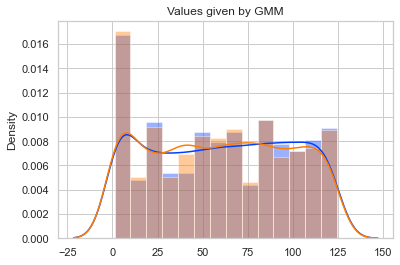

In [100]:
z22,_ = best_gmm22.sample(3190)
plt.title('Actual data')
sns.distplot(c)
#plt.show()
plt.title('Values given by GMM')
sns.distplot(z22)
plt.show()

In [101]:
wasserstein_distance(c.flatten(), z22.flatten())

0.9031630781899312